In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Function definition
def f(x):
    x1, x2 = x[0], x[1]
    return 10*x1**2 + 5*x1*x2 + 10*(x2 - 3)**2

# Gradient of function
def grad_f(x):
    x1, x2 = x[0], x[1]
    df_dx1 = 20*x1 + 5*x2
    df_dx2 = 5*x1 + 20*(x2 - 3)
    return np.array([df_dx1, df_dx2])


## Analytical closed-form solution: solve grad f = 0

In [3]:
H = np.array([[20., 5.],
              [ 5., 20.]]) # Hessian matrix
b = np.array([0., 60.]) # from gradient calculation
x_closed = np.linalg.solve(H, b)
f_closed = f(x_closed)

## Gradient Descent Implementation : 

In [4]:
def gradient_descent(x0, alpha, tol=0.001, max_iter=100000):
    x = x0.copy()
    iter_count = 0
    
    while np.linalg.norm(grad_f(x)) > tol and iter_count < max_iter:
        x = x - alpha * grad_f(x)
        iter_count += 1
    
    return x, f(x), iter_count

## Visualizing Surface

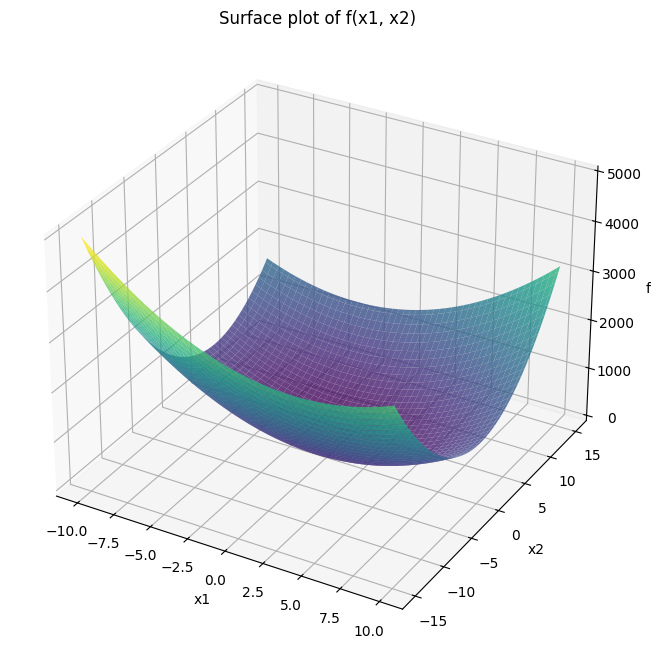

In [5]:
x1_vals = np.linspace(-10, 10, 100)
x2_vals = np.linspace(-15, 15, 100)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
Z = 10*X1**2 + 5*X1*X2 + 10*(X2 - 3)**2

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Z, cmap='viridis', alpha=0.8)
ax.set_title("Surface plot of f(x1, x2)")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("f")
plt.show()

In [6]:
# Initial point
x0 = np.array([10.0, 15.0])

# Different step sizes
alphas = [0.001, 0.005, 0.01, 0.05]
results = []

print("Step Size | Iterations | Minima (x1,x2) | f(x)")
print("-"*60)
for alpha in alphas:
    minima, fval, iters = gradient_descent(x0, alpha)
    results.append((alpha, iters, minima, fval))
    print(f"{alpha:<9} | {iters:<10} | {minima} | {fval:.6f}")


Step Size | Iterations | Minima (x1,x2) | f(x)
------------------------------------------------------------
0.001     | 614        | [-0.80004464  3.20004865] | -6.000000
0.005     | 119        | [-0.80004534  3.20004818] | -6.000000
0.01      | 58         | [-0.80003966  3.20004094] | -6.000000
0.05      | 10         | [-0.7999897   3.20001125] | -6.000000


## Analytical solution (Closed form)

In [7]:
# f(x) ; f'(x) => Gradient = 0 => Ax + b = 0
# Hessian is [[20, 5], [5, 20]]
x_opt = -np.linalg.inv(H).dot(b)
f_opt = f(x_opt)

print("\nAnalytical Solution:")
print(f"Minima at: {x_opt}")
print(f"Function value at minima: {f_opt:.6f}")


Analytical Solution:
Minima at: [ 0.8 -3.2]
Function value at minima: 378.000000
